In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
import datetime as dt
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\saiju\Downloads\7282_1.csv.zip",encoding='utf-8')
print('Data Size', data.shape)

Data Size (35912, 19)


In [16]:
data.head(1).T

,0
address,Riviera San Nicol 11/a
categories,Hotels
city,Mableton
country,US
latitude,45.421611
longitude,12.376187
name,Hotel Russo Palace
postalCode,30126
province,GA
reviews.date,2013-09-22T00:00:00Z


In [17]:
data.isnull().sum()

address                     0
categories                  0
city                        0
country                     0
latitude                   86
longitude                  86
name                        0
postalCode                 55
province                    0
reviews.date              259
reviews.dateAdded           0
reviews.doRecommend     35912
reviews.id              35912
reviews.rating            862
reviews.text               24
reviews.title            1626
reviews.userCity        19649
reviews.username           43
reviews.userProvince    18394
dtype: int64

In [18]:
data = data.drop(['reviews.doRecommend','reviews.id'],axis=1)

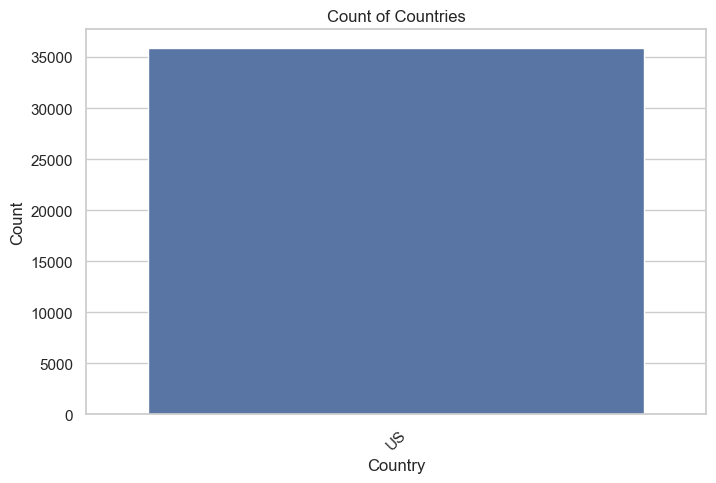

In [19]:
country = data['country'].value_counts()
# Create a bar plot
sns.barplot(x=country.index, y=country.values)
# Add labels and title (optional)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Countries')
# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [20]:
#Hotel Name
hotel_name = data['name'].value_counts()
hotel_name[:20]

name
The Alexandrian, Autograph Collection                       1185
Howard Johnson Inn - Newburgh                                714
Americas Best Value Inn                                      567
Fiesta Inn and Suites                                        546
Ip Casino Resort Spa                                         392
Best Western Plus Waterville Grand Hotel                     335
Hampton Inn Virginia Beach Oceanfront North                  334
Comfort Suites                                               326
New York Marriott Marquis                                    320
Best Western of Long Beach                                   317
Plaza Hotel and Casino - Las Vegas                           289
Doubletree By Hilton West Palm Beach Airport                 276
Anaheim Marriott Suites                                      275
Jacksonville Plaza Hotel and Suites                          264
Red Roof Inn Erie                                            243
Hotel Deca - A Noble

array([[<Axes: title={'center': 'Ratings'}>]], dtype=object)

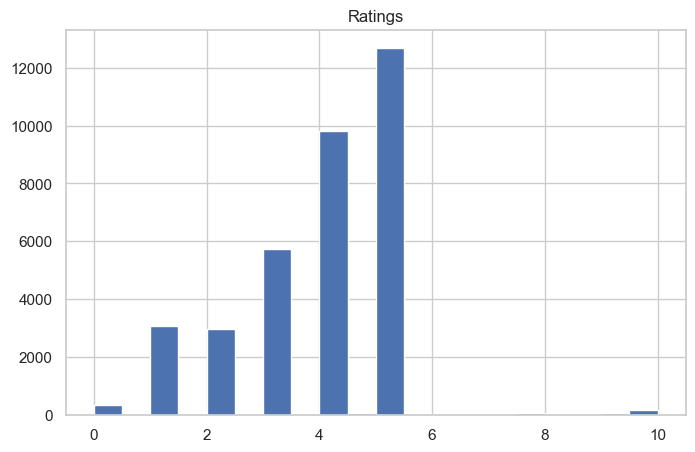

In [21]:
plt.rcParams['figure.figsize'] = (8, 5.0)
scores = pd.DataFrame({"Ratings":data["reviews.rating"]})
scores.hist(bins=20)

In [22]:
data['Date'] = pd.to_datetime(data['reviews.dateAdded'], errors='coerce')
data['new_date'] = [d.date() for d in data['Date']]
data['new_time'] = [d.time() for d in data['Date']]
data['day'] = pd.DatetimeIndex(data['new_date']).day 
data['month'] = pd.DatetimeIndex(data['new_date']).month
data['year'] = pd.DatetimeIndex(data['new_date']).year 
data = data.drop(['Date'],axis=1)

C:\Users\saiju\AppData\Local\Temp\ipykernel_25724\466446574.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Review_Day_Count.index, y=Review_Day_Count.values, alpha=0.8, palette=colors_day)
C:\Users\saiju\AppData\Local\Temp\ipykernel_25724\466446574.py:13: UserWarning: 
The palette list has fewer values (5) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=Review_Day_Count.index, y=Review_Day_Count.values, alpha=0.8, palette=colors_day)


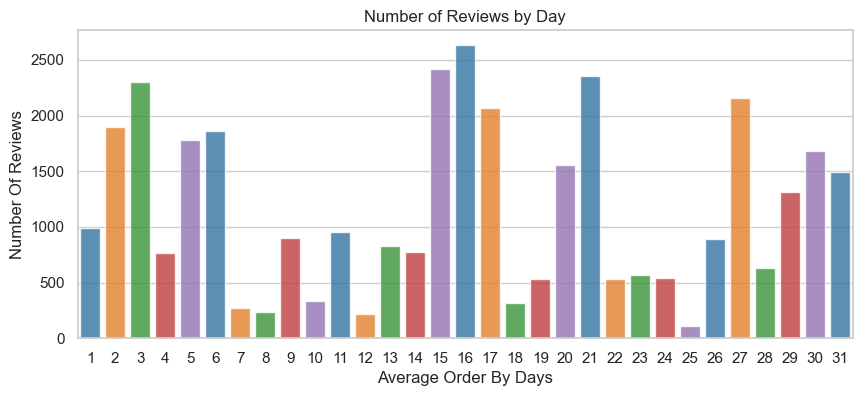

C:\Users\saiju\AppData\Local\Temp\ipykernel_25724\466446574.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Reviews_Count_Month.index, y=Reviews_Count_Month.values, alpha=0.8, palette=colors_month)
C:\Users\saiju\AppData\Local\Temp\ipykernel_25724\466446574.py:21: UserWarning: 
The palette list has fewer values (5) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=Reviews_Count_Month.index, y=Reviews_Count_Month.values, alpha=0.8, palette=colors_month)


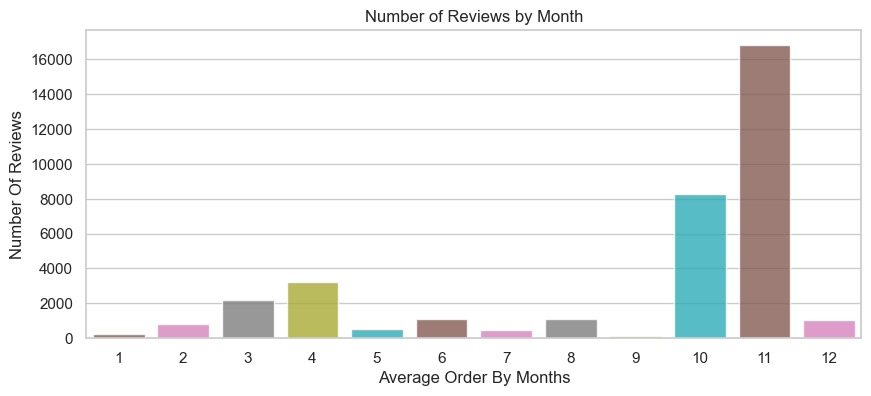

C:\Users\saiju\AppData\Local\Temp\ipykernel_25724\466446574.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Reviews_Year.index, y=Reviews_Year.values, alpha=0.8, palette=colors_year)
C:\Users\saiju\AppData\Local\Temp\ipykernel_25724\466446574.py:29: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x=Reviews_Year.index, y=Reviews_Year.values, alpha=0.8, palette=colors_year)


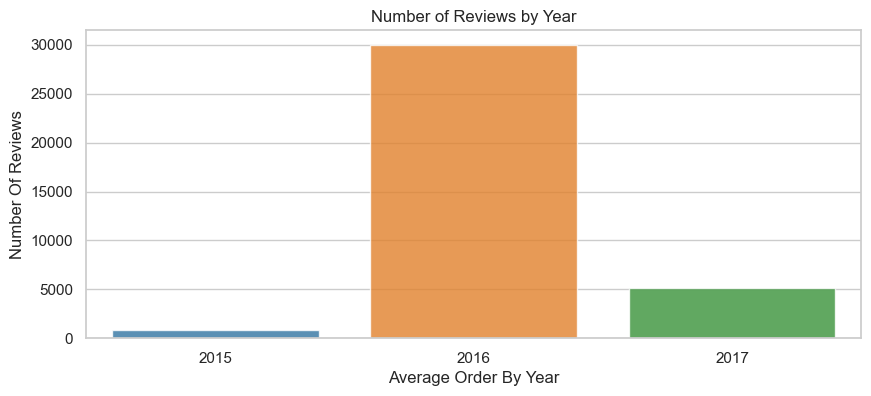

In [23]:
# Calculate counts for each category
Review_Day_Count = data['day'].value_counts()
Reviews_Count_Month = data['month'].value_counts()
Reviews_Year = data['year'].value_counts()

# Custom colors for each plot
colors_day = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Example colors for days
colors_month = ['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']  # Example colors for months
colors_year = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Example colors for years

# Plot for Reviews by Day
plt.figure(figsize=(10, 4))
sns.barplot(x=Review_Day_Count.index, y=Review_Day_Count.values, alpha=0.8, palette=colors_day)
plt.ylabel("Number Of Reviews")
plt.xlabel("Average Order By Days")
plt.title("Number of Reviews by Day")
plt.show()

# Plot for Reviews by Month
plt.figure(figsize=(10, 4))
sns.barplot(x=Reviews_Count_Month.index, y=Reviews_Count_Month.values, alpha=0.8, palette=colors_month)
plt.ylabel("Number Of Reviews")
plt.xlabel("Average Order By Months")
plt.title("Number of Reviews by Month")
plt.show()

# Plot for Reviews by Year
plt.figure(figsize=(10, 4))
sns.barplot(x=Reviews_Year.index, y=Reviews_Year.values, alpha=0.8, palette=colors_year)
plt.ylabel("Number Of Reviews")
plt.xlabel("Average Order By Year")
plt.title("Number of Reviews by Year")
plt.show()


C:\Users\saiju\AppData\Local\Temp\ipykernel_25724\4218704967.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=User_Ferq.index,y=User_Ferq.values,palette=UserName_color)
C:\Users\saiju\AppData\Local\Temp\ipykernel_25724\4218704967.py:3: UserWarning: 
The palette list has fewer values (10) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=User_Ferq.index,y=User_Ferq.values,palette=UserName_color)


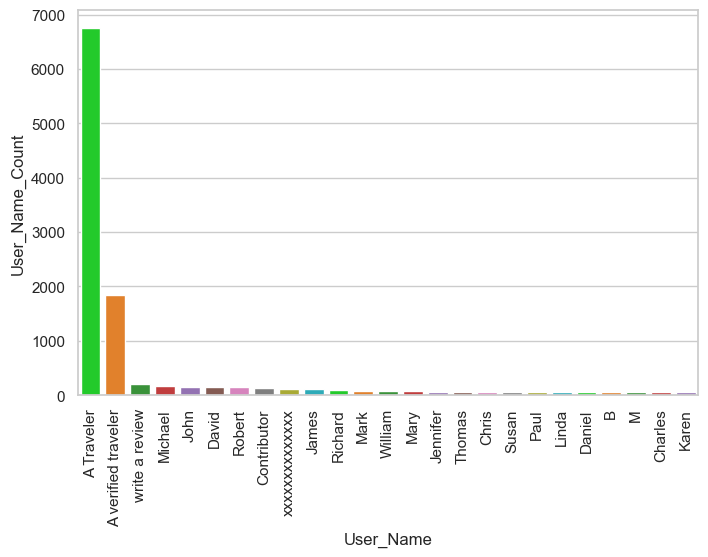

<Axes: xlabel='reviews.username'>

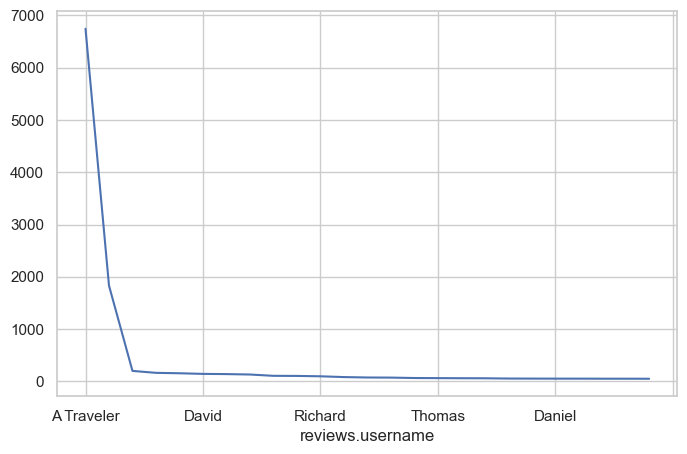

In [24]:
UserName_color=["#07e612", '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
User_Ferq=data['reviews.username'].value_counts()[:25]
sns.barplot(x=User_Ferq.index,y=User_Ferq.values,palette=UserName_color)
plt.ylabel('User_Name_Count')
plt.xlabel('User_Name')
plt.xticks(rotation='vertical')
plt.show()

User_Ferq.plot()

C:\Users\saiju\AppData\Local\Temp\ipykernel_25724\2376505270.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=data.index, y=data.values, palette=palette)


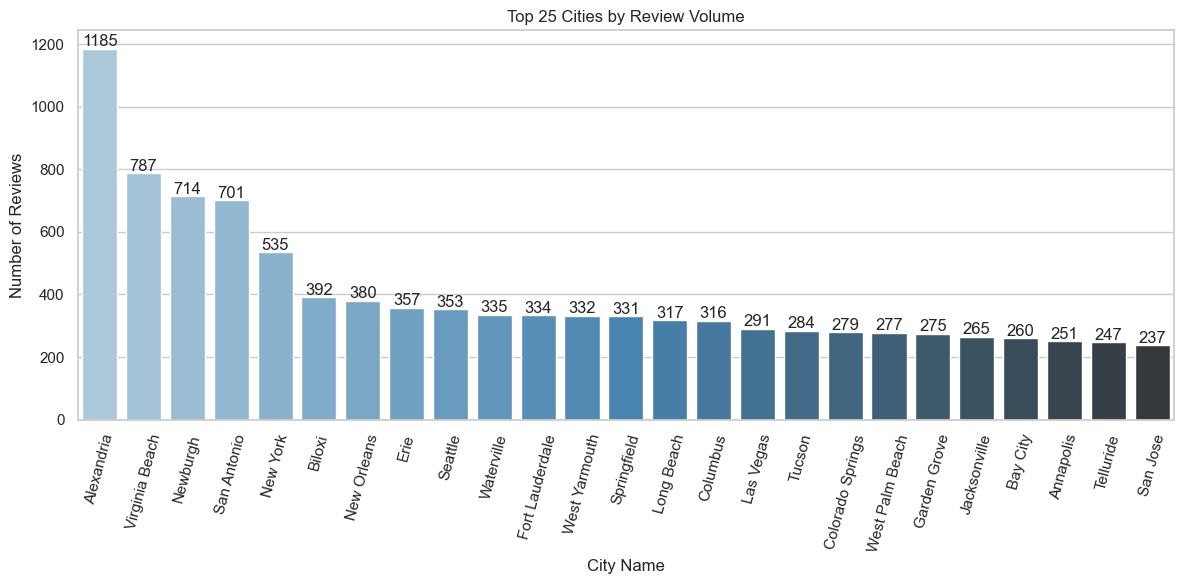

C:\Users\saiju\AppData\Local\Temp\ipykernel_25724\2376505270.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=data.index, y=data.values, palette=palette)


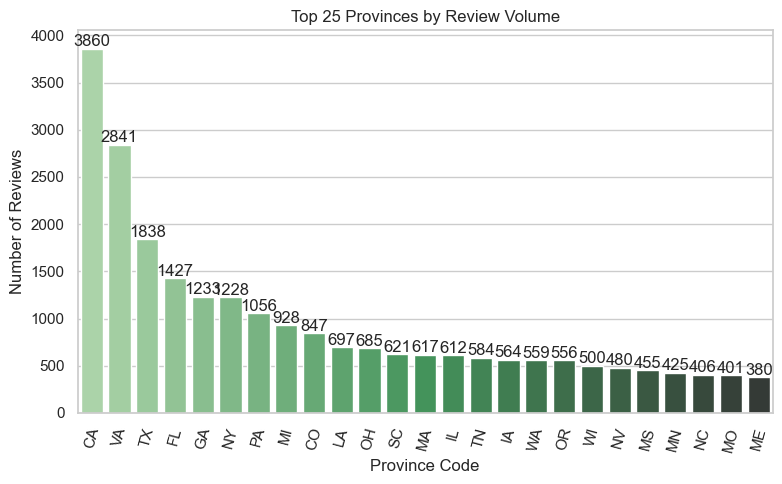

In [25]:
# Set figure size and style
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')

# Function to create bar plots
def create_bar_plot(data, title, xlabel, ylabel, palette):
    plot = sns.barplot(x=data.index, y=data.values, palette=palette)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.xticks(rotation=75)
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 5), 
                      textcoords='offset points')
    plt.tight_layout()
    plt.show()

# City Counts
City_Counts = data['city'].value_counts()[:25]
create_bar_plot(City_Counts, 'Top 25 Cities by Review Volume', 'City Name', 'Number of Reviews', 'Blues_d')

# Province Counts
Province_Counts = data['province'].value_counts()[:25]
create_bar_plot(Province_Counts, 'Top 25 Provinces by Review Volume', 'Province Code', 'Number of Reviews', 'Greens_d')
